In [1]:
import os
os.getcwd()

'C:\\Users\\user\\데이터분석2'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('test2_modify.csv')
df.describe().columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'Adr',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'foreigner', 'Country_ratio', 'car_yes', 'RA_changed'],
      dtype='object')

In [16]:
df

,IsCanceled,LeadTtime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_stay,foreigner,Country_ratio,country_simple,car_yes,RA,RA_changed
0,0,342,2015,July,27,1,0,0,2,0,...,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,CC,0
1,0,737,2015,July,27,1,0,0,2,0,...,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,CC,0
2,0,7,2015,July,27,1,0,1,1,0,...,0,Check-Out,2015-07-02,1,1,0.172088,GBR,0,AC,1
3,0,13,2015,July,27,1,0,1,1,0,...,0,Check-Out,2015-07-02,1,1,0.172088,GBR,0,AA,0
4,0,14,2015,July,27,1,0,2,2,0,...,1,Check-Out,2015-07-03,1,1,0.172088,GBR,0,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,212,2017,August,35,31,2,8,2,1,...,0,Check-Out,2017-09-10,1,1,0.172088,GBR,0,AA,0
39592,0,169,2017,August,35,30,2,9,2,0,...,1,Check-Out,2017-09-10,1,1,0.054702,IRL,0,EE,0
39593,0,204,2017,August,35,29,4,10,2,0,...,3,Check-Out,2017-09-12,1,1,0.054702,IRL,0,EE,0
39594,0,211,2017,August,35,31,4,10,2,0,...,1,Check-Out,2017-09-14,2,1,0.172088,GBR,0,DD,0


In [4]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed'],
      dtype='object')

- EDA  데이터 탐색

In [5]:
features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled', 
       'BookingChanges', 'DaysInWaitingList', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'day_stay', 'foreigner', 'Country_ratio', 'car_yes',
       'RA_changed']

label = 'IsCanceled'

X, y = df[features], df[label]

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [7]:
model.fit(X,y)

RandomForestClassifier()

In [9]:
model.feature_importances_

array([0.183125  , 0.03389358, 0.08246334, 0.07438362, 0.03405874,
       0.05102801, 0.01695973, 0.01389031, 0.00194129, 0.00512297,
       0.02614627, 0.00917922, 0.02761268, 0.00125537, 0.12705874,
       0.03383085, 0.03800475, 0.02385453, 0.05778627, 0.078973  ,
       0.03131356, 0.04811816])

In [11]:
imp = pd.DataFrame()
imp['feature'] = features
imp['importance'] = model.feature_importances_
imp.sort_values(by='importance', ascending=False).head()

,feature,importance
0,LeadTtime,0.183125
14,Adr,0.127059
2,ArrivalDateWeekNumber,0.082463
19,Country_ratio,0.078973
3,ArrivalDateDayOfMonth,0.074384


In [17]:
#중복 제외 고유값 수 
len(set(df['LeadTtime']))  

412

In [25]:
#평균 취소율을 구해서 그래프로 하기 위함
tgt = df.groupby('LeadTtime').agg({label: 'mean'}).reset_index()

In [23]:
import seaborn as sns

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

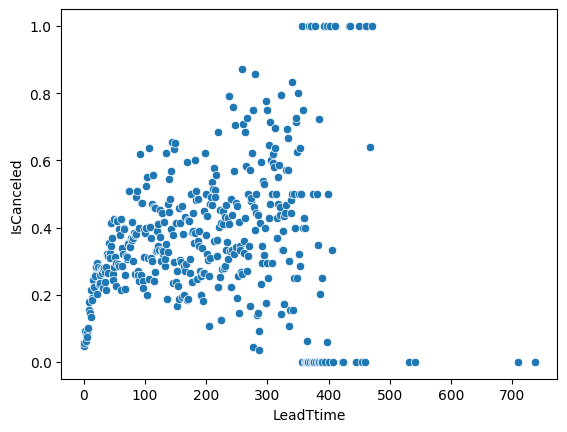

In [24]:
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled')

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

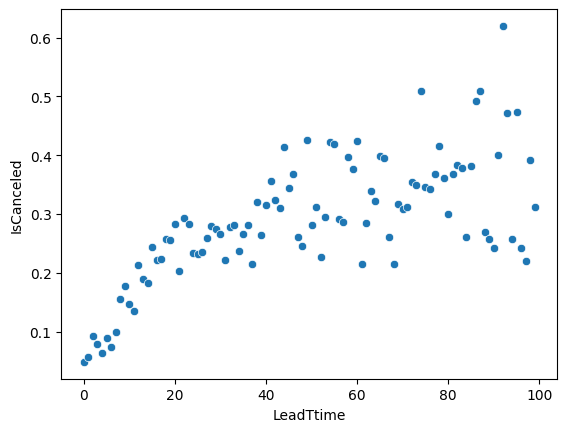

In [27]:
tgt = tgt.loc[tgt['LeadTtime'] < 100]
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled') 
#범위가 길어 100미만 리드타임만보기

In [29]:
tgt = df.groupby(['LeadTtime', 'foreigner']).agg({label:'mean'}).reset_index()
tgt = tgt.loc[tgt['LeadTtime'] < 200]
#내/외국인별 차이를 200미만 리드타임 보기

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

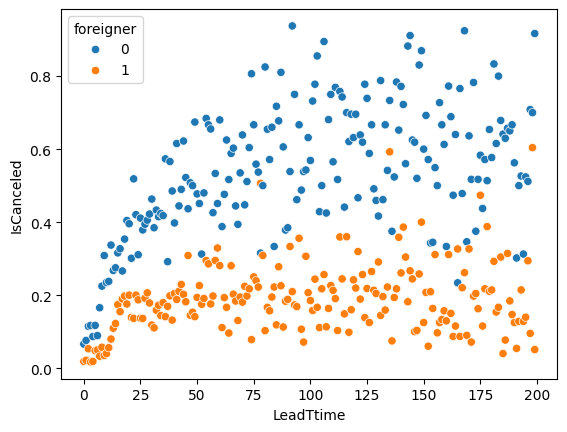

In [31]:
sns.scatterplot(data = tgt , x= 'LeadTtime', y= 'IsCanceled', hue='foreigner')
#0 내국인 1 외국인

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

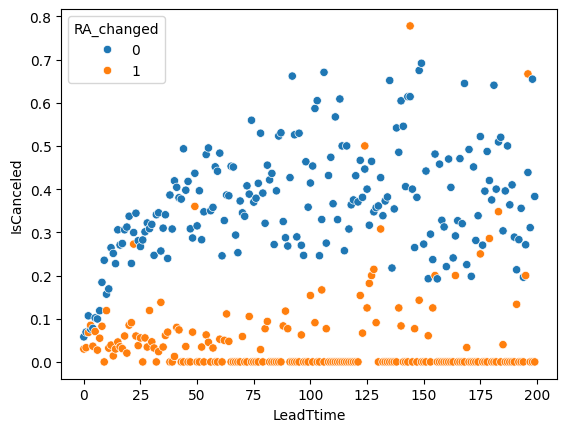

In [32]:
tgt = df.groupby(['LeadTtime', 'RA_changed']).agg({label:'mean'}).reset_index()
tgt = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled', hue='RA_changed')
#배정된 객실이 다를 경우 예약 취소율에 대한 차이는?

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

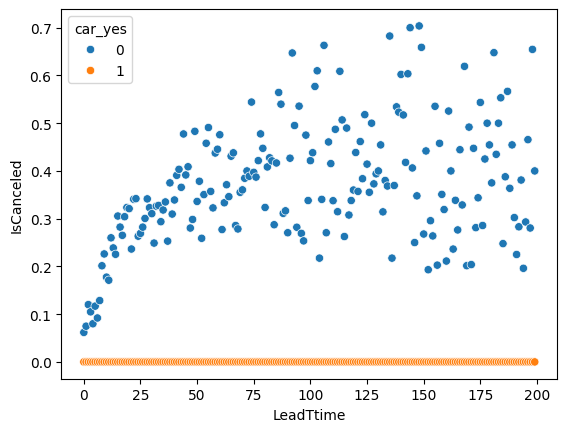

In [33]:
#자가 이용시 취소율은?
tgt = df.groupby(['LeadTtime', 'car_yes']).agg({label:'mean'}).reset_index()
tgt = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled', hue='car_yes')

In [34]:
# 분석 결과 : 내국인의 취소율은 리드타임에 따라, 차를 가져온 외국인은 취소를 거의 안한다 ?

In [35]:
# 예약 경로 탐색하기

In [36]:
set(df['MarketSegment'])

{'Complementary',
 'Corporate',
 'Direct',
 'Groups',
 'Offline TA/TO',
 'Online TA'}

In [37]:
df['MarketSegment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [38]:
df['MarketSegment'].value_counts()

MarketSegment
Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: count, dtype: int64

- Train, Test 데이터 분리

In [39]:
train, test = df[0::2], df[1::2]     # 5 : 5 비율로 나눔
train, test = train.reset_index(), test.reset_index()

#모델 학습에 쓸 입력과 정답으로 분리하는 과정
X_train, y_train = train[features], train[label]
#학습용 입력값/정답값
X_test, y_test = test[features], test[label]
#테스트용 입력값/정답값

- Modeling

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

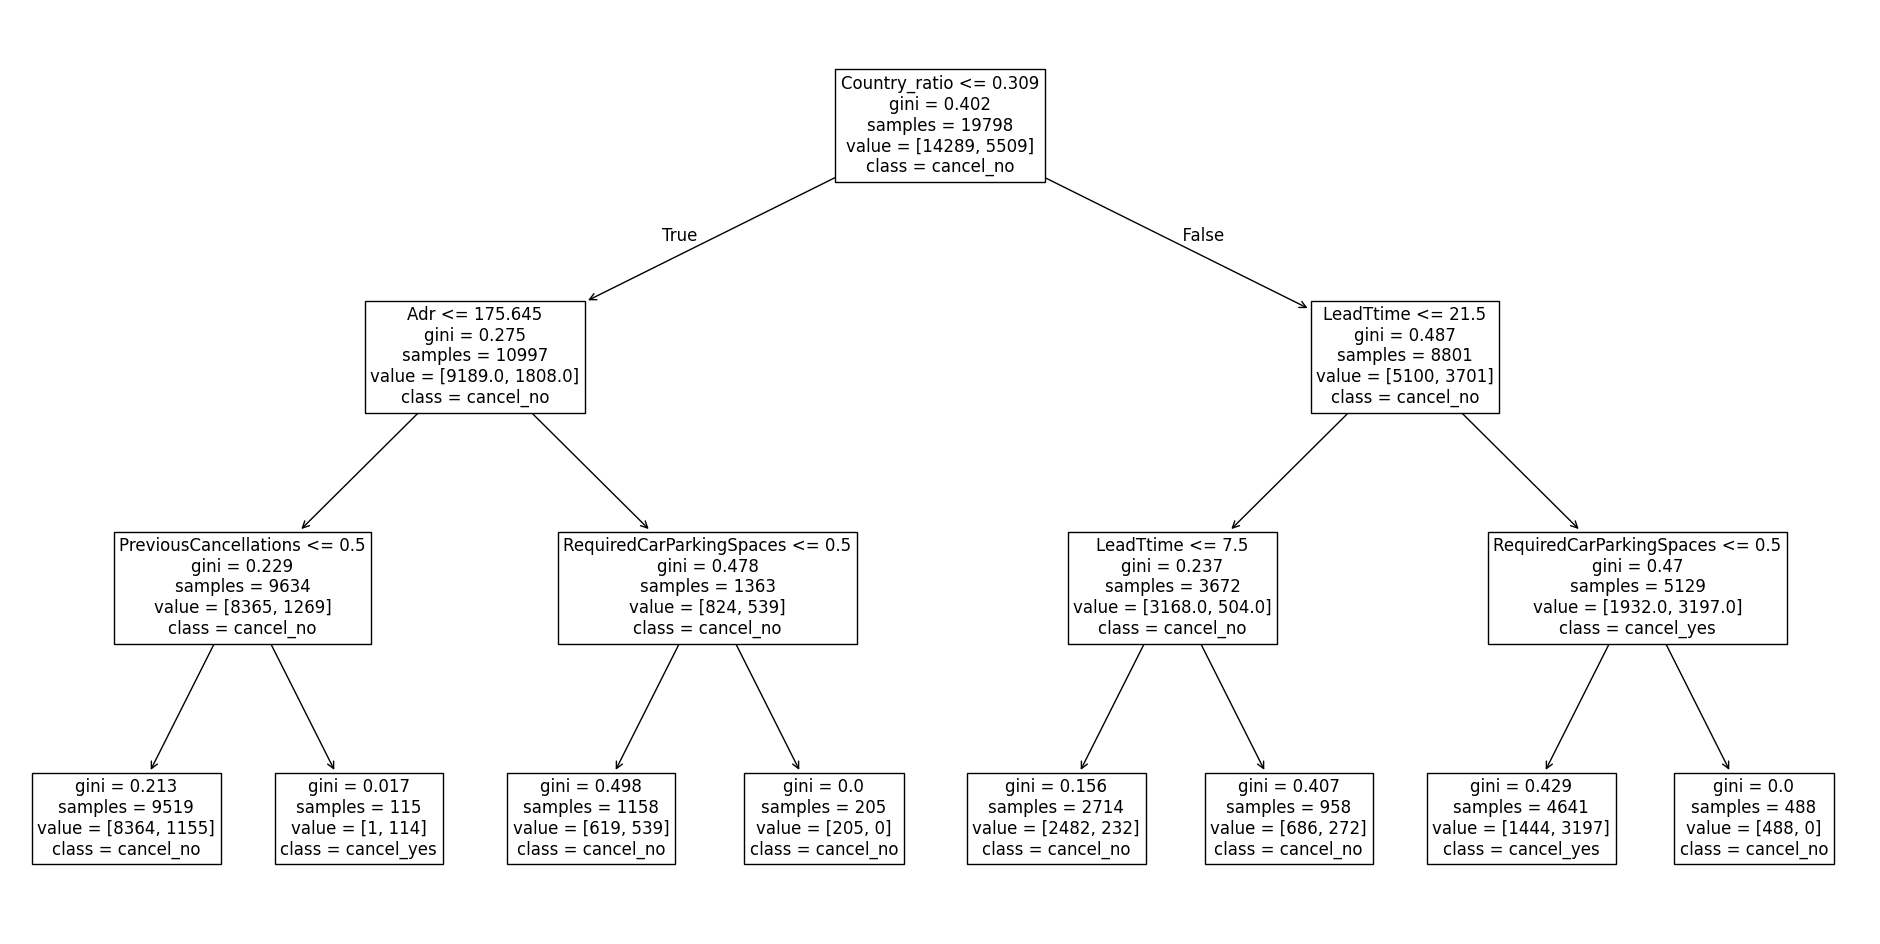

In [43]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
plot_tree(model, max_depth=3, fontsize=12,
          feature_names=X_train.columns,
          class_names = ['cancel_no', 'cancel_yes'])
            #예측하려는 클래스의 이름, 이해하기 쉬워보이게 타겟값을 설정하기
            #no=0, yes=1일때만.

plt.show()

In [45]:
import numpy as np

In [46]:
np.unique(y_train) #  클래스가 헷갈리면 코드쓰기

array([0, 1])

In [47]:
from sklearn.tree import export_graphviz as eg

In [49]:
#결정 트리 모델을 .dot 파일 형식으로 저장해서 이미지 만드는 함수 (알록달록)
eg(model,
   out_file='./tree.dot',
   feature_names=features,
   class_names=['cancel_no', 'cancel_yes'],
   rounded=True, # 사각형 끝을 둥글게
   filled=True ) # 사각형 안 색깔 채우기

In [51]:
#취소한 경우에 대한 set   최대 26번까지도,,,
set(df['PreviousCancellations'])

{0, 1, 2, 3, 4, 5, 14, 19, 24, 25, 26}

- 알고리즘 구분 용어
- 앙상블 : 같이 결과를 도출하는 것 . 랜덤포레스트의 여러개의 트리 도출이 예시
- 회귀문제 : n개의 알고리즘 결과값들의 평균
- 분류문제 : n개의 알고리즘 결과값들이 투표


- bagging : 데이터 셋의 row를 무작위로 복원 추출 후 새로운 데이터 셋을 생성 - 여러개 생성                        train : 테스트>학습용 데이터 중 복원 추출 > 분류 : 투표, 회귀:평균                                           동일한 데이터로 알고리즘 학습하면 항상 같은 결과가 나오지만 bootstrap을 이용하면 새로운 데이터셋 만들 때 마다     row구성이 조금씩 다르게 됨. n개의 데이터셋에 대해 학습 진행되고 n개의 학습된 예측 결과를 합산!

- boosting : 튜닝을 병행해야해서 충분한 시간을 가지고 해야함. 그렇지 않다면 랜덤포레스트  1문제 틀고 틀린 문제가 나오면 1번의 틀리문제를 풀고 돌고 돌아 정답을 극대화하는 알고리즘. 이전 학습이 끝나야 다음 학습이 진행됨


- GBDT : Decision Tree를 사용해 이전 Tree의 오차를 보완하는 방식으로 경사 하강법을 사용해서 앙상블하는 방법       XGBoost, CatBoost, LightGBM 병렬처리가 어느 정도 가능 / 부스팅만 병렬처리 불가능

- 분류 문제의 평가 지표 : 회귀 문제에선 숫자의 크기를 이용해 틀림의 정도를 나타 낼 수 있으며 혼동 행렬 개념을 도입

In [52]:
df = pd.read_csv('test2_modify.csv')

features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'Adr',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'foreigner', 'Country_ratio', 'car_yes', 'RA_changed']
label = 'IsCanceled'

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [53]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(19798,))

In [54]:
y_test

0        0
1        0
2        0
3        0
4        1
        ..
19793    0
19794    0
19795    0
19796    0
19797    0
Name: IsCanceled, Length: 19798, dtype: int64

In [55]:
for_plot = pd.DataFrame()
for_plot['actual'] = y_test
for_plot['predict'] = model.predict(X_test)
for_plot

,actual,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
19793,0,0
19794,0,0
19795,0,0
19796,0,0


- 혼동 행렬 (나도 혼동)